In [2]:
# import pandas as pd
# import csv
# df = pd.read_csv('INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2017_A_31-12-2017.csv', sep=';', encoding='iso-8859-1', skiprows=7)

## Pré-processamento

In [16]:
import pandas as pd
import numpy as np
import csv
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns

In [4]:
lista_dfs_dec = []
lista_dfs_fec = []
files = glob(r'Arquivos\indicadores-continuidade-coletivos-*.csv')
for file in files:
    df = pd.read_csv(file, sep=';', encoding='iso-8859-1')
    filtro_dec_sp = (df['SigIndicador'] == 'DEC') & (df['SigAgente'] == 'ELETROPAULO         ')
    filtro_fec_sp = (df['SigIndicador'] == 'FEC') & (df['SigAgente'] == 'ELETROPAULO         ')
    base_dec_sp = df[filtro_dec_sp]
    base_fec_sp = df[filtro_fec_sp]
    lista_dfs_dec.append(base_dec_sp) 
    lista_dfs_fec.append(base_fec_sp) 

df_dec = pd.concat(lista_dfs_dec, ignore_index=True)
df_fec = pd.concat(lista_dfs_fec, ignore_index=True)


In [5]:
for column in df_dec.columns:
    column_new = column.strip()
    df_dec[column] = df_dec[column_new]

for column in df_fec.columns:
    column_new = column.strip()
    df_fec[column] = df_fec[column_new]

In [6]:
df_dec['VlrIndiceEnviado'] = df_dec['VlrIndiceEnviado'].str.replace(',','.')
df_dec['VlrIndiceEnviado'] = df_dec['VlrIndiceEnviado'].astype('float')

df_fec['VlrIndiceEnviado'] = df_fec['VlrIndiceEnviado'].str.replace(',','.')
df_fec['VlrIndiceEnviado'] = df_fec['VlrIndiceEnviado'].astype('float')


In [7]:
df_dec['Data'] = pd.to_datetime(
    df_dec['AnoIndice'].astype(str) + '-' + 
    df_dec['NumPeriodoIndice'].astype(str) + '-01'
)

df_fec['Data'] = pd.to_datetime(
    df_fec['AnoIndice'].astype(str) + '-' + 
    df_fec['NumPeriodoIndice'].astype(str) + '-01'
)


In [8]:
df_dec.head(10)

,DatGeracaoConjuntoDados,SigAgente,NumCNPJ,IdeConjUndConsumidoras,DscConjUndConsumidoras,SigIndicador,AnoIndice,NumPeriodoIndice,VlrIndiceEnviado,Data
0,2025-12-05,ELETROPAULO,61695227000193,11111.0,Jandira,DEC,2010,5,0.51,2010-05-01
1,2025-12-05,ELETROPAULO,61695227000193,11111.0,Jandira,DEC,2010,7,0.60,2010-07-01
2,2025-12-05,ELETROPAULO,61695227000193,11111.0,Jandira,DEC,2010,2,1.08,2010-02-01
3,2025-12-05,ELETROPAULO,61695227000193,11113.0,Jardim São Luis,DEC,2010,9,1.78,2010-09-01
4,2025-12-05,ELETROPAULO,61695227000193,11135.0,São Paulo Represa Sul,DEC,2010,7,6.97,2010-07-01
5,2025-12-05,ELETROPAULO,61695227000193,11115.0,Lapa,DEC,2010,3,1.22,2010-03-01
6,2025-12-05,ELETROPAULO,61695227000193,11115.0,Lapa,DEC,2010,11,0.67,2010-11-01
7,2025-12-05,ELETROPAULO,61695227000193,11115.0,Lapa,DEC,2010,1,1.88,2010-01-01
8,2025-12-05,ELETROPAULO,61695227000193,11113.0,Jardim São Luis,DEC,2010,10,1.51,2010-10-01
9,2025-12-05,ELETROPAULO,61695227000193,11115.0,Lapa,DEC,2010,10,0.38,2010-10-01


In [38]:
df_dec['DscConjUndConsumidoras'] = df_dec['DscConjUndConsumidoras'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
df_dec['Regiao'] = df_dec['DscConjUndConsumidoras']

df_fec['DscConjUndConsumidoras'] = df_fec['DscConjUndConsumidoras'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
df_fec['Regiao'] = df_fec['DscConjUndConsumidoras']

conjuntos = {
    'AEROPORTO': 'ZS',
    'AGUA BRANCA': 'ZO',
    'ALEX. DE GUSMAO': 'RM SE',
    'ALPHAVILLE': 'RM NO',
    'ALTO DA BOA VISTA': 'ZS',
    'ALVARENGA': 'RM SE',
    'AMERICANOPOLIS': 'ZS',
    'ANASTACIO': 'ZO',
    'ANCHIETA': 'RM SE',
    'ANHEMBI': 'ZN',
    'ARICANDUVA': 'ZL',
    'AUGUSTA': 'ZC',
    'AUTONOMISTAS': 'RM ZO',
    'BANDEIRANTES': 'ZS',
    'BANDEIRANTES_RETICULADO': 'ZS',
    'BARRA FUNDA': 'ZO',
    'BARTIRA': 'EXTREMO LESTE',
    'BARUERI': 'RM ZO',
    'BATISTINI': 'RM SE',
    'BAVIERA': 'RM SE',
    'BELA ALIANCA': 'ZO',
    'BRAS': 'ZC',
    'BRASILANDIA': 'ZN',
    'BRIGADEIRO': 'ZCS',
    'BUENOS AIRES': 'ZC',
    'BUTANTA': 'ZO',
    'CAMBUCI': 'ZC',
    'CAMPESTRE': 'RM SE',
    'CAMPO LIMPO': 'SO',
    'CANAA': 'ZS',
    'CANINDE': 'ZC',
    'CAPAO REDONDO': 'EXTREMO SUL',
    'CAPELA': 'ZS',
    'CAPUAVA': 'RM SE',
    'CARAPICUIBA': 'RM ZO',
    'CARRAO': 'ZL',
    'CASA VERDE': 'ZN',
    'CASTELO': 'ZC',
    'CATUMBI': 'ZL',
    'CAUCAIA': 'RM ZO',
    'CENTRO': 'ZC',
    'CENTRO JARDINS': 'ZC',
    'CLEMENTINO': 'ZCS',
    'CLAUDIA': 'RM SE',
    'COIMBRA': 'RM SE',
    'COMANDANTE TAYLOR': 'ZS',
    'CONGONHAS': 'ZS',
    'CONTINENTAL': 'ZO',
    'COTIA': 'RM ZO',
    'CUPECE': 'ZS',
    'CURSINO': 'ZCS',
    'DIADEMA': 'RM SE',
    'ECO PERUS': 'ZO',
    'EMBU': 'RM SO',
    'EMBU GUACU': 'RM SO',
    'ERMELINO MATARAZZO': 'EXTREMO LESTE',
    'ESPLANADA': 'RM ZO',
    'GATO PRETO': 'RM NO',
    'GERMANIA': 'SO',
    'GOMES CARDIM': 'ZL',
    'GOPOUVA': 'RM NE',
    'GRANJA JULIETA': 'ZS',
    'GRANJA VIANA': 'RM ZO',
    'GUAIANAZES': 'EXTREMO LESTE',
    'GUARAPIRANGA': 'EXTREMO SUL',
    'GUMERCINDO': 'ZCS',
    'HIPODROMO': 'ZL',
    'IBIRAPUERA': 'ZCS',
    'IMIGRANTES': 'ZS',
    'INTERLAGOS': 'ZS',
    'IPIRANGA': 'ZS',
    'ITAIM': 'ZCS',
    'ITAIM PAULISTA': 'EXTREMO LESTE',
    'ITAPECERICA DA SERRA': 'RM SO',
    'ITAPECERICA DA SERRA - CENTRO': 'RM SO',
    'ITAPEVI': 'RM ZO',
    'ITAQUERA': 'ZL',
    'ITAQUERA - IGUATEMI': 'ZL',
    'ITAQUERUNA': 'ZS',
    'JABAQUARA': 'ZS',
    'JACANA': 'ZN',
    'JAGUARE': 'ZO',
    'JANDIRA': 'RM ZO',
    'JARAGUA': 'EXTREMO NORTE',
    'JARDIM SAO LUIS': 'ZS',
    'JD. DA GLORIA': 'ZCS',
    'JOAO CLIMACO': 'ZS',
    'JORDANESIA': 'RM NO',
    'JUQUITIBA': 'RM SO',
    'JUSCELINO KUBITSCHEK': 'ZCS',
    'LAPA': 'ZO',
    'LEOPOLDINA': 'ZO',
    'LIMAO': 'ZN',
    'LUBECA': 'ZS',
    'MANDAQUI': 'ZN',
    'MATEUS': 'ZL',
    'MAUA': 'RM SE',
    'MENINOS': 'RM SE',
    'MIGUEL PAULISTA': 'ZL',
    'MIGUEL REALE': 'ZO',
    'MIGUEL REALE_RETICULADO': 'ZC',
    'MONCOES': 'ZCS',
    'MONTE AZUL': 'EXTREMO SUL',
    'MONTE BELO': 'RM ZO',
    'MONTE SANTO': 'ZL',
    'MONUMENTO': 'ZS',
    'MOOCA': 'ZCL',
    'MORUMBI': 'ZO',
    'NACOES': 'RM SE',
    'NOVO BANDEIRANTES': 'DUVIDA',
    'NOVO MUNDO': 'ZN',
    'OESTE': 'ZO',
    'ORATORIO': 'ZL',
    'OSASCO': 'RM ZO',
    'PAINEIRAS': 'RM SO',
    'PARELHEIROS': 'EXTREMO SUL',
    'PARNAIBA': 'RM NO',
    'PARQUE DOS LAGOS': 'ZS',
    'PARQUE SAO DOMINGOS': 'ZO',
    'PAULA SOUZA': 'ZC',
    'PENHA': 'ZL',
    'PENHA NOVA': 'ZL',
    'PERI': 'ZN',
    'PINHEIROS': 'ZO',
    'PIRAPORINHA': 'RM SE',
    'PIRITUBA': 'ZO',
    'PLANALTO': 'ZS',
    'PLANALTO PAULISTA': 'ZCS',
    'PONTA PORA': 'ZO',
    'PONTE PRETA': 'RM SE',
    'RAPOSO TAVARES': 'ZO',
    'REMEDIOS': 'ZO',
    'REPRESINHA': 'RM ZO',
    'RIBEIRAO PIRES': 'RM SE',
    'RIBEIRAO PIRES-RIO G. DA SERRA': 'RM SE',
    'RIO BONITO': 'EXTREMO SUL',
    'RIO GRANDE': 'RM SE',
    'ROSELANDIA': 'RM ZO',
    'SABARA': 'ZS',
    'SACOMA': 'ZS',
    'SANTA MARIA': 'RM ZO',
    'SANTANA': 'ZN',
    'SANTO AMARO': 'ZS',
    'SANTO ANDRE': 'RM SE',
    'SANTO ANDRE - REPRESA': 'RM SE',
    'SAO BERNARDO DO CAMPO': 'RM SE',
    'SAO BERNARDO DO CAMPO -REPRESA': 'RM ZS',
    'SAO CAETANO DO SUL': 'RM SE',
    'SAO MATEUS': 'EXTREMO LESTE',
    'SAO MIGUEL PAULISTA': 'EXTREMO LESTE',
    'SAO PAULO  CENTRO': 'ZC',
    'SAO PAULO REPRESA SUL': 'ZS',
    'SAPOPEMBA': 'ZL',
    'SAUDE': 'ZS',
    'SERTAOZINHO': 'RM SE',
    'SILVESTRE': 'RM SE',
    'SUMARE': 'ZO',
    'TABOAO DA SERRA': 'RM SO',
    'TAIPAS': 'EXTREMO NORTE',
    'TAMBORE': 'RM NO',
    'TAMOIO': 'RM SE',
    'TATUAPE': 'ZL',
    'TENENTE MARQUES': 'RM NO',
    'TIRADENTES': 'EXTREMO LESTE',
    'TOMAZ EDSON': 'ZO',
    'TUCURUVI': 'ZN',
    'TUIUTI': 'ZL',
    'UTINGA': 'RM SE',
    'VARGEM GRANDE': 'RM SO',
    'VARGINHA': 'EXTREMO SUL',
    'VILA ALMEIDA': 'RM ZO',
    'VILA EMA': 'ZL',
    'VILA FORMOSA': 'ZL',
    'VILA GUILHERME': 'ZL',
    'VILA MARIANA': 'ZS',
    'VILA MATILDE': 'ZL',
    'VILA MEDEIROS': 'ZN',
    'VILA PAULA': 'RM SE',
    'VILA PAULICEIA': 'RM SE',
    'VILA PROSPERIDADE': 'RM SE',
    'VILA PRUDENTE': 'ZL',
    'VILA TALARICO': 'ZL',
    'VITORIA': 'RM SE'
}

df_dec["Regiao"] = df_dec["Regiao"].map(conjuntos)
df_fec["Regiao"] = df_fec["Regiao"].map(conjuntos)

df_dec['Concessão'] = np.where(df_dec['AnoIndice'] > 2018, 'ENEL', 'Eletropaulo')
df_fec['Concessão'] = np.where(df_fec['AnoIndice'] > 2018, 'ENEL', 'Eletropaulo')

## Análise exploratória


### DEC


In [39]:
# CRIANDO CAMPOS DE TENDÊNCIA CENTRAL
df_dec_anual = df_dec.groupby(['Data'])['VlrIndiceEnviado'].mean().reset_index()
df_dec_mediana = df_dec.groupby(['Data'])['VlrIndiceEnviado'].median().reset_index()

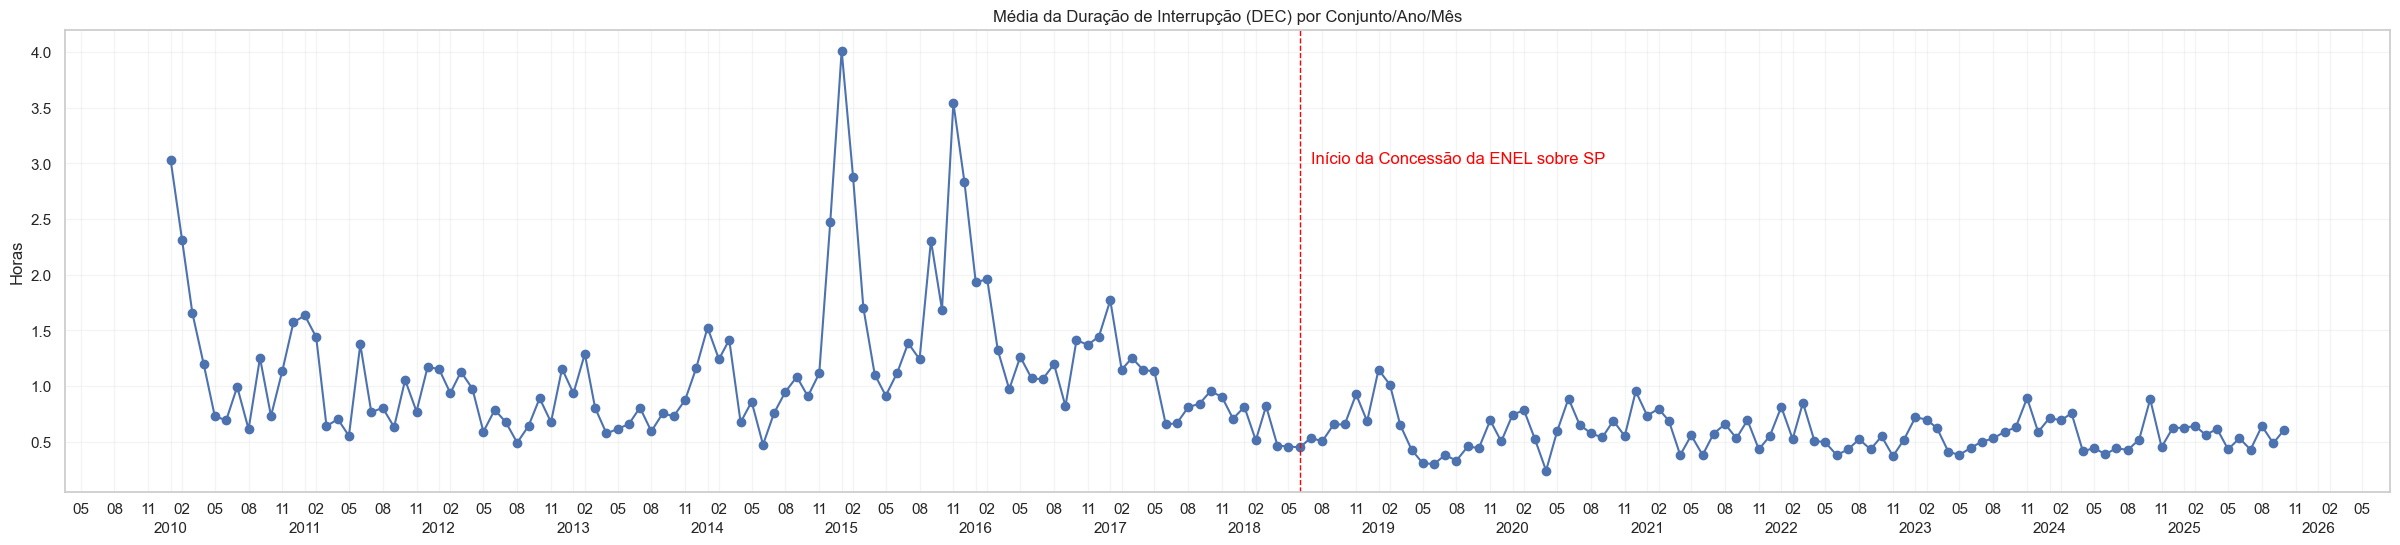

In [36]:
# PLOTANDO GRÁFICO DE LINHA PARA VISUALIZAÇÃO INICIAL
plt.figure(figsize=(30, 6))
plt.plot(df_dec_anual['Data'], df_dec_anual['VlrIndiceEnviado'], marker='o')

# 3. Configurar a hierarquia visual no Eixo X
ax = plt.gca()

# Definir os anos como marcadores principais (embaixo)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%Y')) # \n joga o ano para baixo

# Definir os meses como marcadores secundários (em cima)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.axvline(x=datetime(2018, 6, 1), linewidth=1, color='red', linestyle='--')
ax.annotate('Início da Concessão da ENEL sobre SP', color='red', xy=(datetime(2018, 6, 1), 3), xytext=(datetime(2018, 7, 1),3))
plt.title('Média da Duração de Interrupção (DEC) por Conjunto/Ano/Mês')
plt.ylabel('Horas')
plt.grid(True, which='both', alpha=0.2)
plt.show()

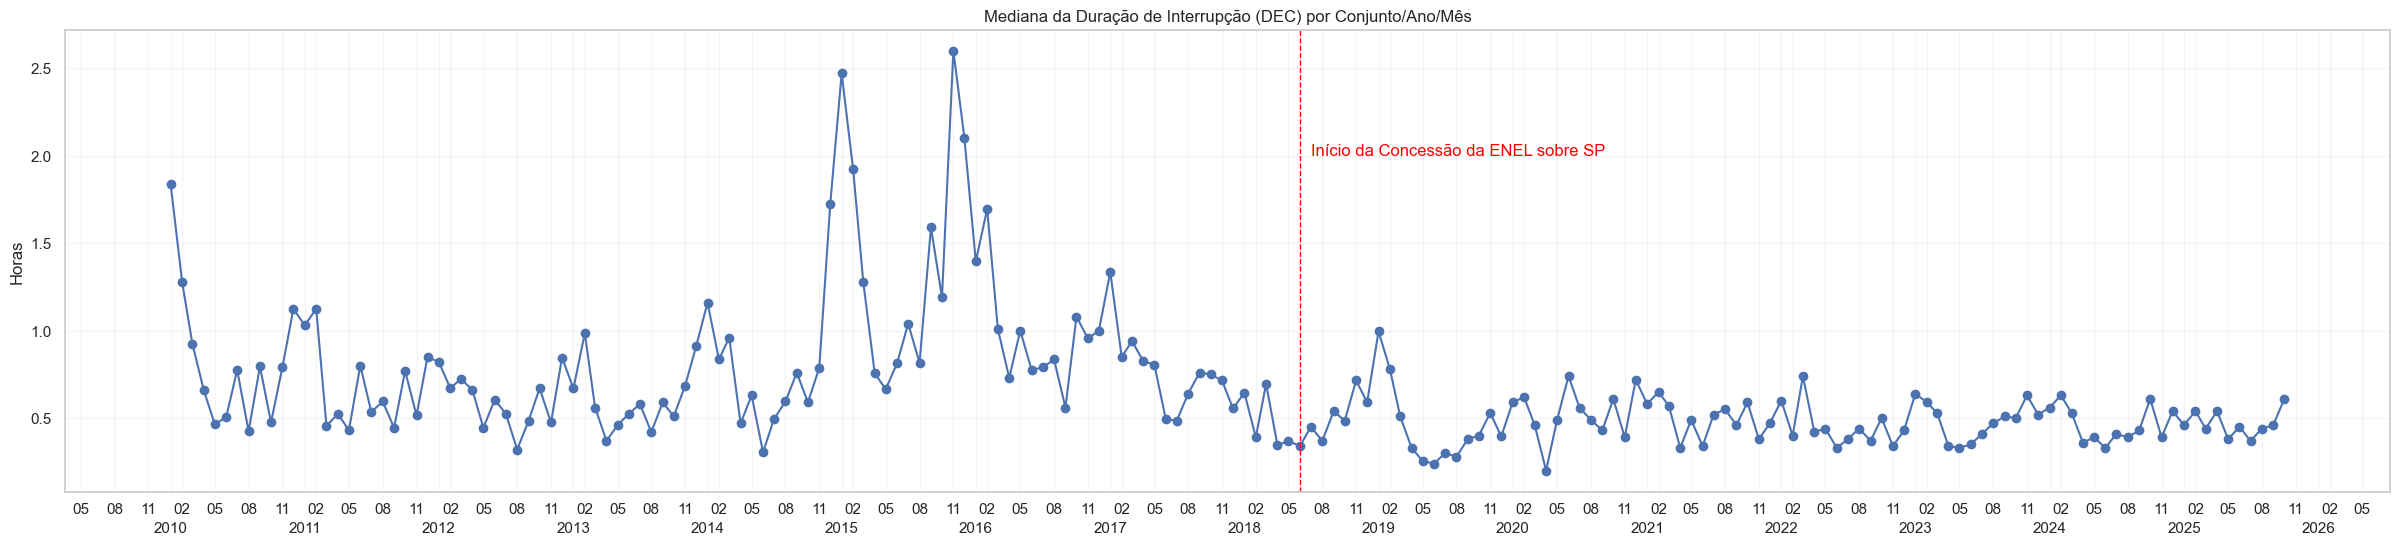

In [37]:
plt.figure(figsize=(30, 6))
plt.plot(df_dec_mediana['Data'], df_dec_mediana['VlrIndiceEnviado'], marker='o')

# 3. Configurar a hierarquia visual no Eixo X
ax = plt.gca()

# Definir os anos como marcadores principais (embaixo)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%Y')) # \n joga o ano para baixo

# Definir os meses como marcadores secundários (em cima)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.axvline(x=datetime(2018, 6, 1), linewidth=1, color='red', linestyle='--')
ax.annotate('Início da Concessão da ENEL sobre SP', color='red', xy=(datetime(2018, 6, 1), 2), xytext=(datetime(2018, 7, 1),2))
plt.title('Mediana da Duração de Interrupção (DEC) por Conjunto/Ano/Mês')
plt.ylabel('Horas')
plt.grid(True, which='both', alpha=0.2)
plt.show()

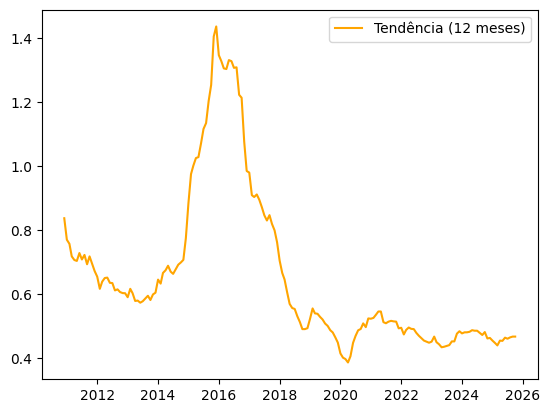

In [12]:
# Criando uma média móvel de 12 meses para ver a tendência real
df_dec_mediana['Media_Movel'] = df_dec_mediana['VlrIndiceEnviado'].rolling(window=12).mean()

plt.plot(df_dec_mediana['Data'], df_dec_mediana['Media_Movel'], color='orange', label='Tendência (12 meses)')
plt.legend()

C:\Users\julia\AppData\Local\Temp\ipykernel_25428\4214378374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Concessão', y='VlrIndiceEnviado', data=df_dec[(df_dec['Regiao']=='ZCS') & (df_dec['AnoIndice']>2012)], palette='Set2')


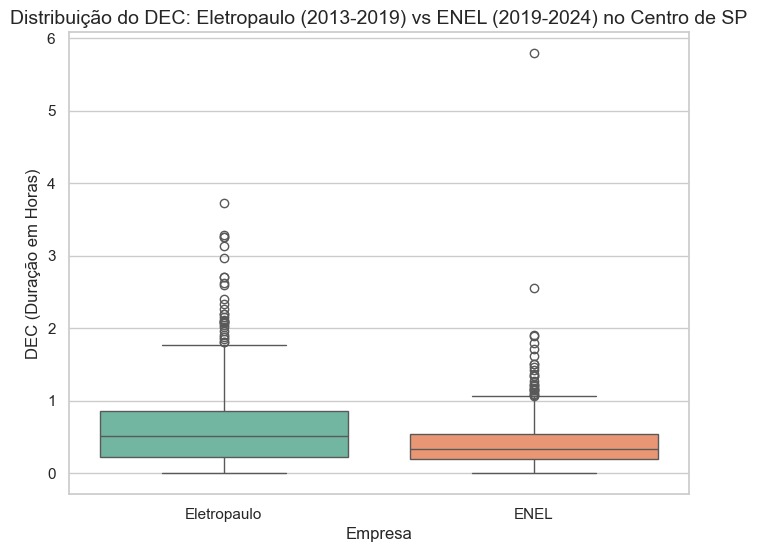

In [33]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Concessão', y='VlrIndiceEnviado', data=df_dec[(df_dec['Regiao']=='ZCS') & (df_dec['AnoIndice']>2012)], palette='Set2')

plt.title('Distribuição do DEC: Eletropaulo (2013-2019) vs ENEL (2019-2024) no Centro de SP', fontsize=14)
plt.ylabel('DEC (Duração em Horas)')
plt.xlabel('Empresa')
plt.show()

### FEC

In [40]:
df_fec_anual = df_fec.groupby(['Data'])['VlrIndiceEnviado'].mean().reset_index()
df_fec_mediana = df_fec.groupby(['Data'])['VlrIndiceEnviado'].median().reset_index()

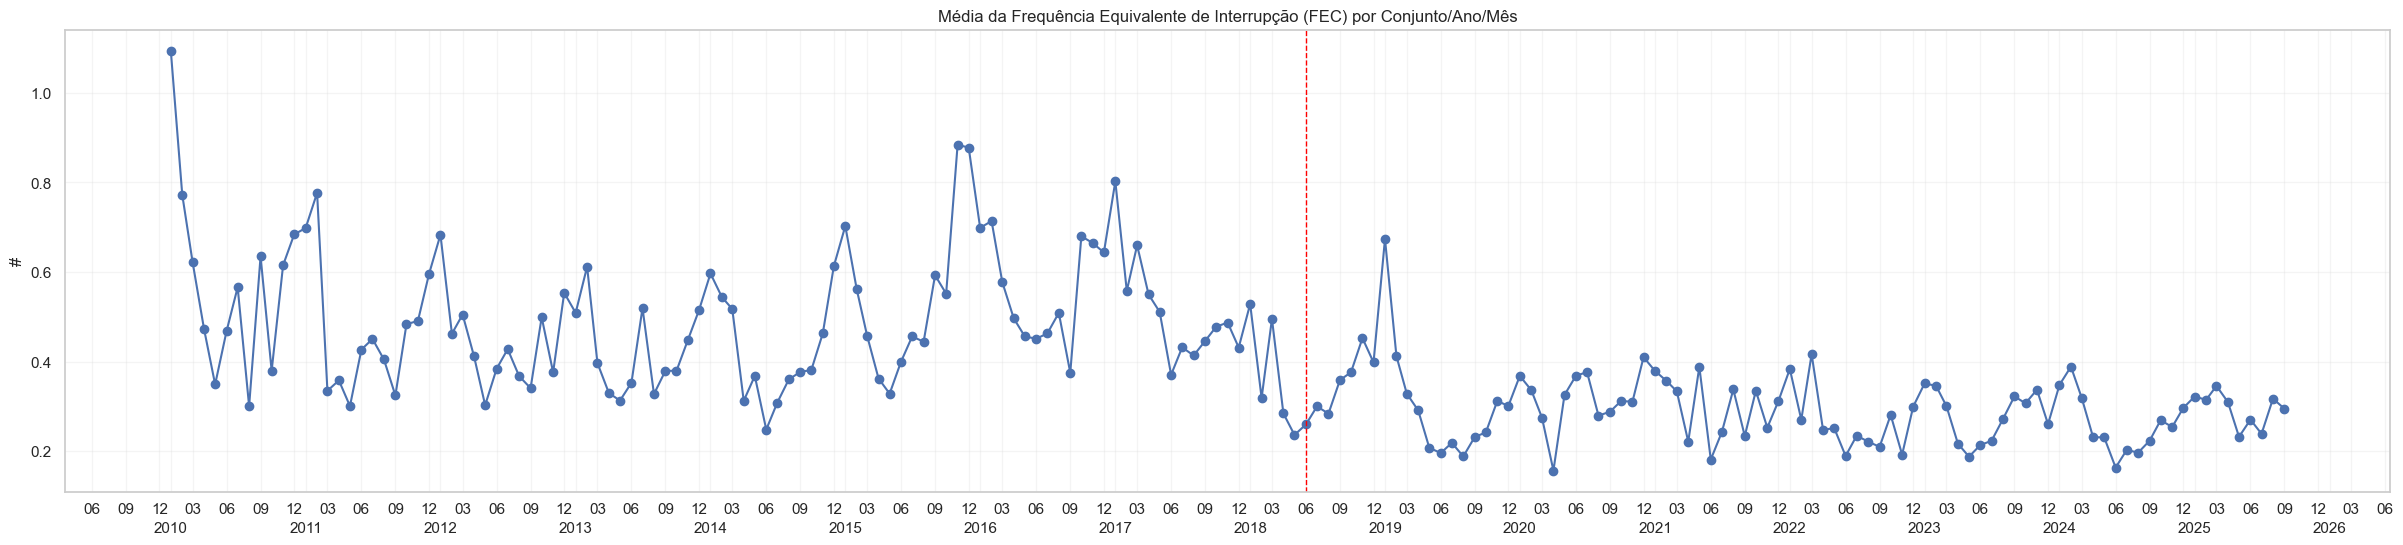

In [41]:
plt.figure(figsize=(30, 6))
plt.plot(df_fec_anual['Data'], df_fec_anual['VlrIndiceEnviado'], marker='o')

# 3. Configurar a hierarquia visual no Eixo X
ax = plt.gca()

# Definir os anos como marcadores principais (embaixo)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%Y')) # \n joga o ano para baixo

# Definir os meses como marcadores secundários (em cima)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.axvline(x=datetime(2018, 6, 1), linewidth=1, color='red', linestyle='--')

plt.title('Média da Frequência Equivalente de Interrupção (FEC) por Conjunto/Ano/Mês')
plt.ylabel('#')
plt.grid(True, which='both', alpha=0.2)
plt.show()

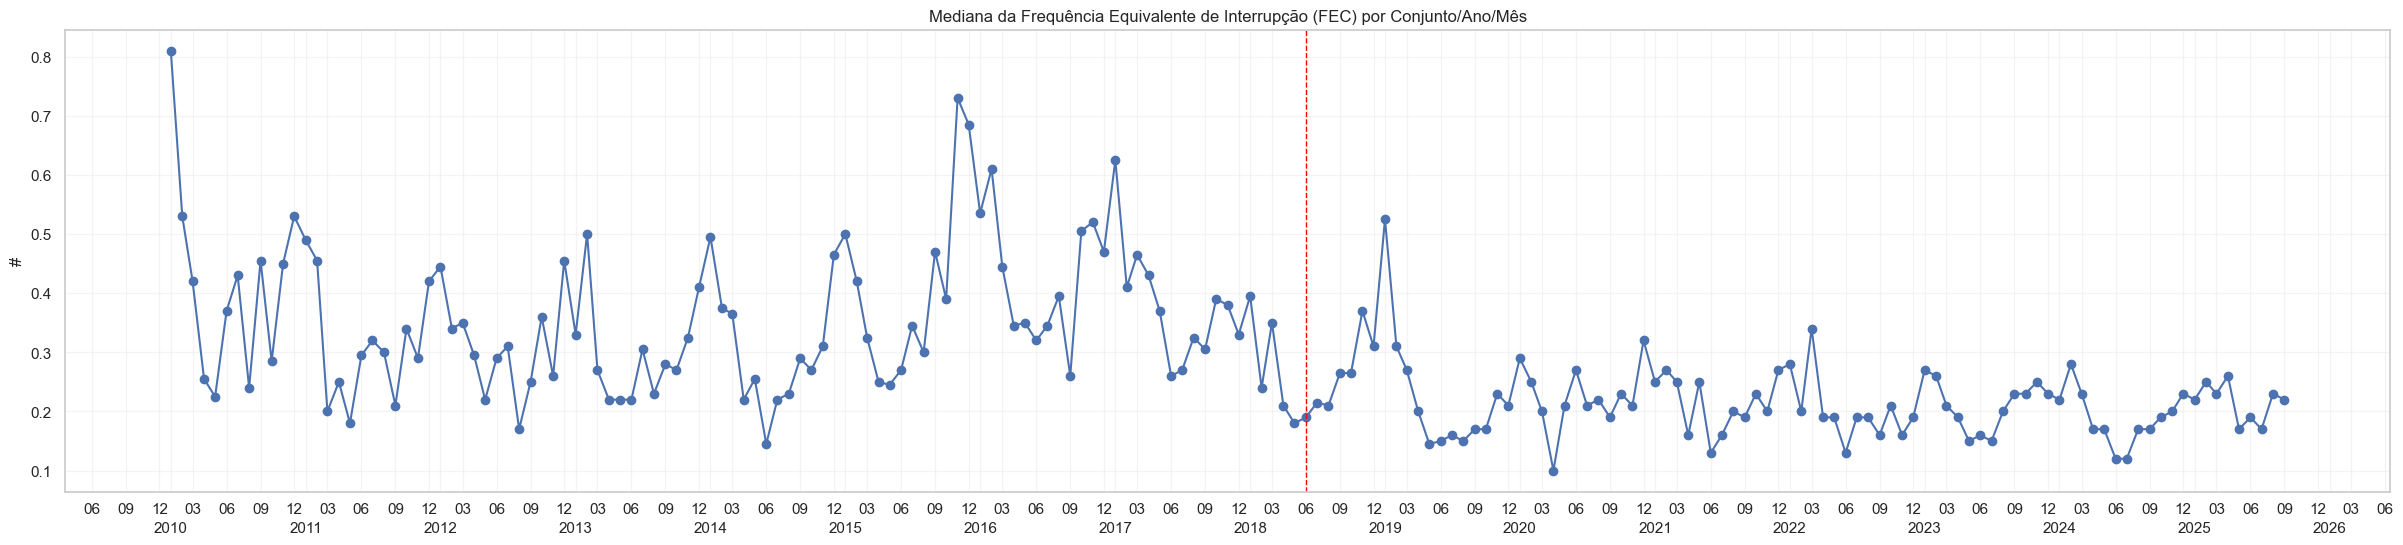

In [42]:
plt.figure(figsize=(30, 6))
plt.plot(df_fec_mediana['Data'], df_fec_mediana['VlrIndiceEnviado'], marker='o')

# 3. Configurar a hierarquia visual no Eixo X
ax = plt.gca()

# Definir os anos como marcadores principais (embaixo)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%Y')) # \n joga o ano para baixo

# Definir os meses como marcadores secundários (em cima)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.axvline(x=datetime(2018, 6, 1), linewidth=1, color='red', linestyle='--')

plt.title('Mediana da Frequência Equivalente de Interrupção (FEC) por Conjunto/Ano/Mês')
plt.ylabel('#')
plt.grid(True, which='both', alpha=0.2)
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_25428\193182315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Concessão', y='VlrIndiceEnviado', data=df_fec[(df_fec['Regiao']=='ZCS') & (df_fec['AnoIndice']>2012)], palette='Set2')


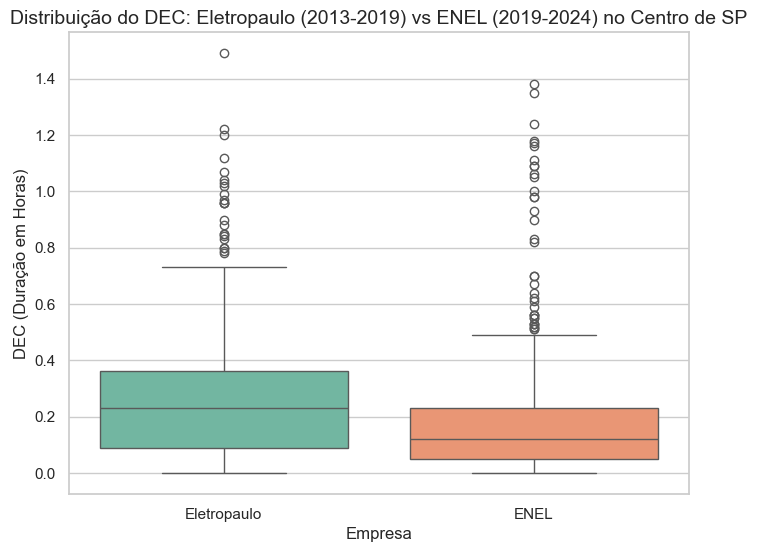

In [43]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Concessão', y='VlrIndiceEnviado', data=df_fec[(df_fec['Regiao']=='ZCS') & (df_fec['AnoIndice']>2012)], palette='Set2')

plt.title('Distribuição do DEC: Eletropaulo (2013-2019) vs ENEL (2019-2024) no Centro de SP', fontsize=14)
plt.ylabel('DEC (Duração em Horas)')
plt.xlabel('Empresa')
plt.show()